## Import des librairies 

In [559]:
import pandas as pd

## Importations des dataset preparation pour fusion

In [599]:
wassem_css = pd.read_csv('wassem_css.csv', sep='\t')
wassem_hovy_naacl = pd.read_csv('wassem_hovy_naacl.csv', sep='\t')
davidson = pd.read_csv('davison.csv', sep=',')
#df_train = pd.read_csv('data.csv', sep=';', header = None, names=['id','tweets','label')
df_train = pd.read_csv('data.csv', sep=';')

In [600]:
wassem_hovy_naacl.head(1)

,Tweet_ID,Previous,User_ID,Text,Label
0,567080871472017408,5.670786e+17,2941145694,@truaemusic The followers of the religion give...,racism


In [601]:
wassem_hovy_naacl.shape

(16202, 5)

In [602]:
#recherche et supprission des doublons
#dataTestDoublon = wassem_hovy_naacl
#for i in range(0,len(dataTestDoublon)):
 #   for j in range(i+1,len(dataTestDoublon)):
  #      if(dataTestDoublon.Text[i]==dataTestDoublon.Text[j]):

In [603]:
# Dans le jeux de donnée wassem_hovy_naacl, 'none' == 'none' 'racism' == racism 'sexism' == sexism
#afficher la fonction si dessous pour le comprendre en analysant quelque tweets
for i in range(0, 10):
    print(wassem_hovy_naacl.Label[i])
    print(wassem_hovy_naacl.Text[i])

racism
@truaemusic The followers of the religion give a shit about the prophet of the religion. He is their example and always will be.
racism
@Love___Egypt @washingtonpost All the land that Islam holds came from war and murder. The US does not occupy a single country anywhere.
racism
@CamilleHughes16 @edbarber101658 @_Watch_Observe_ A piece at a time. Start by outlawing new Mosques and stoping Muslim immigration.
racism
@KellyTurner99 @brushyblues @buellerishere The rapist represent Islam because it's approved in the Quran and Hadiths, microbrain.
racism
@buellerishere Who cares. ISIS does what Mohammed did. Tens of thousands also do and have joined him. Muslims crazy. http://t.co/JXkY2pdJ93
racism
@MaDaSaHaTtEr_17 @buttercupashby There is no love and respect in the Quran. It is full of hatred, bigotry, sexism and incitement to murder.
racism
@discerningmumin But your whole conversation about slavery is phony bull shit propaganda since you follow a slave owner prophet.
racism
@ExposeF

In [604]:
wassem_css.head(1)

,Tweet_ID,Previous,User_ID,Text,Expert_Annotation,Amateur_Annotations
0,570775709343461377,5.707751e+17,24414732,@TVBachelor @NewJerzeyBoy what about the femin...,both,"[neither,sexism,sexism]"


In [605]:
wassem_css.shape

(6667, 6)

In [606]:
# renomens les colonne car class est un mot clé du langage et ne peut etre indexé je le modifie en class = classification
davidson.rename(columns={'Unnamed: 0': 'Unnamed: 0', 'count': 'count', 'hate_speech': 'hate_speech', 'offensive_language': 'offensive_language','neither': 'neither','class': 'Label', 'tweet':'Tweet'}, inplace=True)

In [607]:
# nouvelle affichage de davidson
davidson.head(1)

,Unnamed: 0,count,hate_speech,offensive_language,neither,Label,Tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...


In [608]:
# Dans le jeux de donnée Davidson, '2' == 'none' '0' == racism '1' == sexism
#afficher la fonction si dessous pour le comprendre en analysant quelque tweets

for i in range(0, 10):
    print(davidson.Label[i])
    print(davidson.Tweet[i])

2
!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1
!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
1
!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
1
!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
1
!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
1
!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"
1
!!!!!!"@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!"
1
!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;
1
" &amp; you might not get ya bitch back &amp; thats that "
1
" @rhyth

In [609]:
# suppression des @anotation de nom dans davidson.csv
import re

In [610]:
# suppression des @anotation de nom dans davidson.csv
import re
for i in range(0,10):
    davidson['Tweet'][i]=re.sub(r'(@.*?)[\s]', ' ', davidson['Tweet'][i])
    print(davidson['Tweet'][i])


#tweet = re.sub(r'(@.*?)[\s]', ' ', tweet)

!!! RT  As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
!!!!! RT  boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
!!!!!!! RT  Dawg!!!! RT  You ever fuck a bitch and she start to cry? You be confused as shit
!!!!!!!!! RT   she look like a tranny
!!!!!!!!!!!!! RT  The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
!!!!!!!!!!!!!!!!!!" The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"
!!!!!!" I can not just sit up and HATE on another bitch .. I got too much shit going on!"
!!!!&#8220; cause I'm tired of you big bitches coming for us skinny girls!!&#8221;
" &amp; you might not get ya bitch back &amp; thats that "
"  :hobbies include: fighting Mariam"

bitch


/home/eric/anaconda3/envs/NLPMachineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [611]:
davidson.shape

(24783, 7)

In [612]:
# Dans le jeux de donnée data qui est le notre, 'none' == 'none' 'racism' == racism 'sexism' == sexism
#afficher la fonction si dessous pour le comprendre en analysant quelque tweets

for i in range(0, 10):
    print(df_train.Label[i])
    print(df_train.Tweets[i])

none
@azzamalirhabi @JihadiA8 This video of the Peshmerga decimating ISIS is far more interesting. https://t.co/d36g1z12NP
none
Oh really? No more instant restaurants? THAT'S SHOCKING. #MKR #MKR2015
none
RT @Benfrancisallen: It hasn't been a good few weeks for #ISIS. A new front has opened up in #Sinjar and they're about to lose the battle fâ€¦
none
RT @NoToFeminism: I donâ€™t need femisnsn because men carry heavy things that i cannot!!! like shopping, boxes, and a huge sense of superioriâ€¦
none
@MariachiMacabre 19% is not the vast majority
racism
@DianH4 @ExposeFalsehood And it is Muslims who were the first crusaders, attacking the Christian world for centuries before it attacked back
racism
@truaemusic @mattybboi83 @Number10gov Capital Hill is a great example of how seldom the world attacks Islam given the daily provocations.
sexism
RT @fruitondabottom: #FeminismisEQUALITYwhen Men are actually listened to and part of the dialog. #HeForShe #WomenAgainstFeminism http://t.â€¦
none
Gath

# COMPARAISON DES DATASETS AFIN DE LES FUSIONNER

##### Pour chaque dataset on aura :
- Pour les non discriminatif
    * none + neither + 2
- Pour les tweets discriminatif
    * both + racism + sexism + 1 + 0

### Transformation des labels des dataset afin de les fusionner au notre

In [613]:
davidson.head(1)

,Unnamed: 0,count,hate_speech,offensive_language,neither,Label,Tweet
0,0,3,0,0,3,2,!!! RT As a woman you shouldn't complain abou...


In [614]:
# renomens les colonne car class est un mot clé du langage et ne peut etre indexé je le modifie en class = classification
davidson.rename(columns={'Unnamed: 0': 'del', 'count': 'del', 'hate_speech': 'del', 'offensive_language': 'del','neither': 'del','classification': 'Label', 'tweet':'Tweet'}, inplace=True)

In [615]:
davidson.head(1)

,del,del,del,del,del,Label,Tweet
0,0,3,0,0,3,2,!!! RT As a woman you shouldn't complain abou...


In [616]:
#on renomme les colones a supprimer
wassem_css.rename(columns={'Tweet_ID': 'del', 'Previous': 'del', 'User_ID': 'del', 'Text': 'Tweet','Expert_Annotation': 'Label','Amateur_Annotations': 'del'}, inplace=True)

In [617]:
wassem_css.head(1)

,del,del,del,Tweet,Label,del
0,570775709343461377,5.707751e+17,24414732,@TVBachelor @NewJerzeyBoy what about the femin...,both,"[neither,sexism,sexism]"


In [618]:
#on renomme les colones a supprimer
wassem_hovy_naacl.rename(columns={'Tweet_ID': 'del', 'Previous': 'del', 'User_ID': 'del', 'Text': 'Tweet','label': 'Label','Amateur_Annotations': 'del'}, inplace=True)

In [619]:
wassem_hovy_naacl.head(1)

,del,del,del,Tweet,Label
0,567080871472017408,5.670786e+17,2941145694,@truaemusic The followers of the religion give...,racism


In [620]:
df_train.head(1)

,ID,Tweets,Label
0,560934139403436032,@azzamalirhabi @JihadiA8 This video of the Pes...,none


## Suppression des colones inutiles

In [621]:
# Nous les commentons car on deja été utilisé et ne peut plus etre relancé        
del df_train['ID']
del wassem_css['del']
del wassem_hovy_naacl['del']
del davidson['del']

In [622]:
wassem_hovy_naacl.head(1)

,Tweet,Label
0,@truaemusic The followers of the religion give...,racism


In [623]:
wassem_hovy_naacl.Tweet


0        @truaemusic The followers of the religion give...
1        @Love___Egypt @washingtonpost All the land tha...
2        @CamilleHughes16 @edbarber101658 @_Watch_Obser...
3        @KellyTurner99 @brushyblues @buellerishere The...
4        @buellerishere Who cares. ISIS does what Moham...
                               ...                        
16197       @scaryjen @Alfuriuskj @Nayadrikj undead 4ever.
16198    Here's a suggestion, let's make Manu and Colin...
16199    @ardiem1m @Alfonso_AraujoG @MaxBlumenthal @old...
16200    Oh I knew it. Fuuuck. More restaurants. Ok I s...
16201    @Kickyfast @bonegolem @Totalbiscuit @srhbutts ...
Name: Tweet, Length: 16202, dtype: object

In [624]:
# suppression des @anotation de nom dans df_train.csv
import re
for i in range(0,len(wassem_hovy_naacl)):
    #suppression des @anotation
    wassem_hovy_naacl['Tweet'][i]=re.sub(r'(@.*?)[\s]', ' ',wassem_hovy_naacl['Tweet'][i])
    #suppression des urls
    wassem_hovy_naacl['Tweet'][i]=re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', ' ',wassem_hovy_naacl['Tweet'][i])
    
    
wassem_hovy_naacl

#tweet = re.sub(r'(@.*?)[\s]', ' ', tweet)

,Tweet,Label
0,The followers of the religion give a shit abo...,racism
1,All the land that Islam holds came from war ...,racism
2,A piece at a time. Start by outlawing new M...,racism
3,The rapist represent Islam because it's app...,racism
4,Who cares. ISIS does what Mohammed did. Tens ...,racism
...,...,...
16197,undead 4ever.,none
16198,"Here's a suggestion, let's make Manu and Colin...",none
16199,No answer to any of the data I gave you. S...,none
16200,Oh I knew it. Fuuuck. More restaurants. Ok I s...,none


In [586]:
wassem_css['Tweet'][4]

"Rid yourself of #Feminazi, #Fag &amp; #Jewf. Erol's #Funny stand-up reveals #AfMErica. http://t.co/IE4FBNuvA8"

In [587]:
# suppression des @anotation de nom dans wassem_css.csv
import re
for i in range(0,len(wassem_css)):
    #suppression des @anotation
    wassem_css['Tweet'][i]=re.sub(r'(@.*?)[\s]', ' ',wassem_css['Tweet'][i])
    #suppression des urls
    wassem_css['Tweet'][i]=re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', ' ',wassem_css['Tweet'][i])
    
    
    
wassem_css

,Tweet,Label
0,what about the feminazi and the isis member?,both
1,uh... did you watch the video? one of the wom...,both
2,Managed to hit a bird and a small rodent on my...,both
3,"If you believe a #holohoax or #gays, LGBT &amp...",both
4,"Rid yourself of #Feminazi, #Fag &amp; #Jewf. E...",both
...,...,...
6662,Fark. At this rate #mkr won't crown a winner u...,neither
6663,"It's voilá, not walla #mkr",neither
6664,Possibly respond to some support requests with...,neither
6665,. congrats on finding that bug. I'm sure gamer...,neither


In [588]:
davidson['Tweet']

0        !!! RT  As a woman you shouldn't complain abou...
1        !!!!! RT  boy dats cold...tyga dwn bad for cuf...
2        !!!!!!! RT  Dawg!!!! RT  You ever fuck a bitch...
3                    !!!!!!!!! RT   she look like a tranny
4        !!!!!!!!!!!!! RT  The shit you hear about me m...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: Tweet, Length: 24783, dtype: object

In [589]:
davidson

,Label,Tweet
0,2,!!! RT As a woman you shouldn't complain abou...
1,1,!!!!! RT boy dats cold...tyga dwn bad for cuf...
2,1,!!!!!!! RT Dawg!!!! RT You ever fuck a bitch...
3,1,!!!!!!!!! RT she look like a tranny
4,1,!!!!!!!!!!!!! RT The shit you hear about me m...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [590]:
copieDavid = davidson

In [591]:
davidson = copieDavid

In [592]:
davidson['Tweet'][24778]

"you's a muthaf***in lie &#8220;@LifeAsKing: @20_Pearls @corey_emanuel right! His TL is trash &#8230;. Now, mine? Bible scriptures and hymns&#8221;"

In [593]:
import string

In [638]:
# suppression des @anotation de nom dans wassem_css.csv
def data_cleaning_new(dataset):
    
    for i in range(0,len(dataset)):
        # Uppercase -> Lowercase 
        dataset['Tweet'][i] = dataset['Tweet'][i].lower()
        dataset['Tweet'][i]=re.sub(r'(&#[0-9]*;)', ' ',dataset['Tweet'][i])
        dataset['Tweet'][i]=re.sub(r'(@.*?)[\s]', ' ',dataset['Tweet'][i])
        dataset['Tweet'][i]=re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', ' ',dataset['Tweet'][i])
        dataset['Tweet'][i]=re.sub(r'rt', ' ',dataset['Tweet'][i])
        dataset['Tweet'][i]=re.sub(r'!', ' ',dataset['Tweet'][i])
        dataset['Tweet'][i]=re.sub(r'~', ' ',dataset['Tweet'][i])
        # Remove punctuation
        #davidson['Tweet'][i] = "".join([char for char in davidson['Tweet'][i] if char not in string.punctuation])
        # Delete characters 
        #davidson['Tweet'][i] = re.sub("(ð|ÿ|‘|œ|¦|€|˜|™|¸|¤|‚|©|¡|…|”|“|‹|š|±|³|iâ|§|„|~)*", '', davidson['Tweet'][i]) 


    return dataset

In [639]:
data_cleaning_new(davidson)

/home/eric/anaconda3/envs/NLPMachineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/eric/anaconda3/envs/NLPMachineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/eric/anaconda3/envs/NLPMachineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

,Label,Tweet
0,2,as a woman you shouldn't complain about...
1,1,boy dats cold...tyga dwn bad for cuff...
2,1,dawg you ever fuck a bitch a...
3,1,she look like a tranny
4,1,the shit you hear about me mi...
...,...,...
24778,1,you's a muthaf***in lie right his tl is t...
24779,2,"you've gone and broke the wrong hea baby, and..."
24780,1,young buck wanna eat .. dat nigguh like i ain...
24781,1,youu got wild bitches tellin you lies


In [640]:
data_cleaning_new(wassem_css)

,Tweet,Label
0,what about the feminazi and the isis member?,both
1,uh... did you watch the video? one of the wom...,both
2,managed to hit a bird and a small rodent on my...,both
3,"if you believe a #holohoax or #gays, lgbt &amp...",both
4,"rid yourself of #feminazi, #fag &amp; #jewf. e...",both
...,...,...
6662,fark. at this rate #mkr won't crown a winner u...,neither
6663,"it's voilá, not walla #mkr",neither
6664,possibly respond to some suppo requests with ...,neither
6665,. congrats on finding that bug. i'm sure gamer...,neither


In [641]:
data_cleaning_new(wassem_hovy_naacl)

,Tweet,Label
0,the followers of the religion give a shit abo...,racism
1,all the land that islam holds came from war ...,racism
2,a piece at a time. sta by outlawing new mo...,racism
3,the rapist represent islam because it's app...,racism
4,who cares. isis does what mohammed did. tens ...,racism
...,...,...
16197,undead 4ever.,none
16198,"here's a suggestion, let's make manu and colin...",none
16199,no answer to any of the data i gave you. s...,none
16200,oh i knew it. fuuuck. more restaurants. ok i s...,none


In [645]:
wassem_hovy_naacl.count

<bound method DataFrame.count of                                                    Tweet   Label
0       the followers of the religion give a shit abo...  racism
1        all the land that islam holds came from war ...  racism
2         a piece at a time. sta  by outlawing new mo...  racism
3         the rapist represent islam because it's app...  racism
4       who cares. isis does what mohammed did. tens ...  racism
...                                                  ...     ...
16197                                      undead 4ever.    none
16198  here's a suggestion, let's make manu and colin...    none
16199      no answer to any of the data i gave you. s...    none
16200  oh i knew it. fuuuck. more restaurants. ok i s...    none
16201      nice interface  much prettier than the gra...    none

[16202 rows x 2 columns]>

In [625]:
davidson['Tweet'][24782]

'~~Ruffled | Ntac Eileen Dahlia - Beautiful color combination of pink, orange, yellow &amp; white. A Coll http://t.co/H0dYEBvnZB'

In [ ]:
df_train.rename(columns={'Tweets': 'Tweet'}, inplace=True)

In [ ]:
df_train.head(10)

In [ ]:
# suppression des @anotation de nom dans df_train.csv
for i in range(0,len(df_train)):
    #suppression des @anotation
    df_train['Tweet'][i]=re.sub(r'(@.*?)[\s]', ' ',df_train['Tweet'][i])
    #suppression des urls
    df_train['Tweet'][i]=re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', ' ',df_train['Tweet'][i])
    #suppression des retweet
    df_train['Tweet'][i]=re.sub(r'RT', ' ',df_train['Tweet'][i])
    
    
df_train

In [42]:
#pip install pyspellchecker

from spellchecker import SpellChecker

spell = SpellChecker(language='en')

# find those words that may be misspelled
misspelled = spell.unknown(["kil"])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))
    mot = spell.correction(word)
    # Get a list of `likely` options
    print(spell.candidates(word))

type(misspelled)

oil
{'pil', 'kid', 'kal', 'nil', 'kie', 'skil', 'keil', 'lil', 'kilt', 'kir', 'fil', 'kilo', 'oil', 'il', 'gil', 'ail', 'kl', 'ki', 'til', 'kcl', 'bil', 'kif', 'kit', 'kiln', 'mil', 'kel', 'kia', 'kin', 'kix', 'eil', 'kim', 'kill', 'kiel', 'kiu', 'kip', 'xil', 'kio', 'wil'}


set

In [44]:
mot

'oil'

In [52]:
import requests


prefixStr = '<div class="translation-text">'
postfixStr = '</div'

slangText = "#mkr"

r = requests.post('https://www.noslang.com/', {'action': 'translate', 'p': 
slangText, 'noswear': 'noswear', 'submit': 'Translate'})
startIndex = r.text.find(prefixStr)+len(prefixStr)
endIndex = startIndex + r.text[startIndex:].find(postfixStr)

#recupération de la valeur correspondante 
true_val = r.text[startIndex:endIndex]

print(r.text[startIndex:endIndex])

None of the words you entered are in our database. Found a word we're missing? <a href="/addslang">Add it to our dictionary</a>.


In [37]:
# construction du nouveau dico pour les mots en abréviation
true_val

'you ugly a**'

In [ ]:
davidson['Label'][1]==1

## CHANGEMENT DE LABEL POUR CHAQUE DATASET (encodage)

In [ ]:
#changement de Label et encodage des labels
for i in range(0,len(davidson)):
    if(davidson['Label'][i]==2):
        davidson['Label'][i]=0
    else:
        davidson['Label'][i]=1

In [ ]:
davidson.head(3)

In [ ]:
#changement de Label et encodage des labels
for i in range(0,len(wassem_css)):
    if(wassem_css['Label'][i]=='neither'):
        wassem_css['Label'][i]=0
    else:
        wassem_css['Label'][i]=1

In [ ]:
wassem_css.head(3)

In [423]:
#changement de Label et encodage des labels
for i in range(0,len(wassem_hovy_naacl)):
    if(wassem_hovy_naacl['Label'][i]=='none'):
        wassem_hovy_naacl['Label'][i]=0
    else:
        wassem_hovy_naacl['Label'][i]=1

In [424]:
wassem_hovy_naacl.head(3)

,Tweet,Label
0,@truaemusic The followers of the religion give...,1
1,@Love___Egypt @washingtonpost All the land tha...,1
2,@CamilleHughes16 @edbarber101658 @_Watch_Obser...,1


In [425]:
#changement de Label et encodage des labels
for i in range(0,len(df_train)):
    if(df_train['Label'][i]=='none'):
        df_train['Label'][i]=0
    else:
        df_train['Label'][i]=1

In [426]:
#affichage de chaque dataset
df_train.head(3)

,Tweet,Label
0,@azzamalirhabi @JihadiA8 This video of the Pes...,0
1,Oh really? No more instant restaurants? THAT'S...,0
2,RT @Benfrancisallen: It hasn't been a good few...,0


### Fusion des dataset traiter


In [448]:
davidson.shape

(24783, 2)

In [449]:
df_train.shape

(16049, 2)

In [450]:
# fusion de df_train et davidson et suppression des doublons
data_Fusion = df_train.merge(davidson, how='outer') 

In [451]:
data_Fusion.shape

(40832, 2)

In [452]:
wassem_css.shape

(6667, 2)

In [453]:
# fusion de data_Fusion et wassem_css et suppression des doublons
data_Fusion = data_Fusion.merge(wassem_css, how='outer') 

In [454]:
data_Fusion.shape

(44123, 2)

In [455]:
wassem_hovy_naacl.shape

(16202, 2)

In [456]:
# fusion de data_Fusion et wassem_hovy_naacl
#data_Fusion = data_Fusion.merge(wassem_hovy_naacl, how='outer') 

In [457]:
data_Fusion.shape

(47368, 2)

## Convertion des Labels en entier car après fusion ils sont sous la forme de float

In [ ]:
data_Fusion.Label

In [458]:
#conversion de label de float en entier naturel
data_Fusion['Label'] = data_Fusion['Label'].astype(int)

In [461]:
#affichage repartitions des labels  
discriminant = 0
pasDiscriminant = 0

for i in range (0, len(data_Fusion)):
    if(data_Fusion['Label'][i]==0):
        pasDiscriminant = pasDiscriminant+1
    elif(data_Fusion['Label'][i]==1):
        discriminant = discriminant+1

print('nombre de tweet non discrimant : ', pasDiscriminant)
print('nombre de tweet  discrimant : ', discriminant)

nombre de tweet non discrimant :  19389
nombre de tweet  discrimant :  27979


### convertion de notre dataframe en csv 

In [474]:
#convertissons en csv de notre dataframe qui sera le nouveau jeu de donnée
data_Fusion.to_csv(r'discrimant_tweet_47368_dataset.csv', index = False,  header=True)

# Nous avons réaliser les travaux ci-dessous
- nous avons pris 04 dataset de type racism, sexism, discriminant
    * davidson (24783 tweets)
    * wassem_css (66627 tweets)
    * wassem_hovy_naacl (16203 tweets)
    * data (notre dataset d'orrigine avec 16109 tweets)
- nous avons fait des comparaisons sur les différents tweets (nature sexism, racism, none, neitheir...)
- nous avons regrouper les tweets par catégorie comme dans le code plus haut
- notre nouveau dataset contients 47368 tweets différents, déja avec les doublons supprimé et sont tous encoder en binaire
- .....

# -------------**************-----------------*****************----------------------********************------------------*******

# Chargement des données

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('discrimant_tweet_47368_data.csv', sep=',')

#### Affichage de nos données chargés

In [7]:
type(df['Label'][1])

numpy.int64

#### Transformation du dataset en jeux de donnée avec des label binaire
#### 0 pour 'none' et 1 pour 'sexim et autres que none'

In [8]:
dataset = df

# 1-Création des vecteurs One Hot

Import de la librairie Sklearn qui regroupe +sieurs algo de ML la plus utilisé en datasciences,
nous allons utiliser dans un premier temps le CountVectorizer qui est un algo d'extraction de carractéristique pour le BOW
- feature_extraction.text, contient la classe de vectorization Countvectorizer qui dois etre  creer et instancier avant d'etre utiliser sur les données

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [11]:
#instanciation de la classe countVectorizer pour le BOW
count_vect = CountVectorizer()

Avec Sklearn, nous avons trois fonctions principale pour le traitement des données,
- fit() qui permet de faire l'apprentissage et de liéer le modèle aux donnéess
- transform() qui permet d'appliquer les transformations sur les données
- fit_transform() qui permet de faire les deux en même temps, cad permet de calculer tous les vecteurs et d'appliquer le BOW,...

In [120]:
train_text, temp_text, train_labels, temp_labels = train_test_split(dataset['Tweet'], dataset['Label'], 
                                                                    random_state=2018, 
                                                                    test_size=0.1, 
                                                                    stratify=dataset['Label'])

In [121]:
#Vectorization des données d'entrainement (tweets) en utilisant le BOW
# cette etape permet de faire de la vectorization et de construire notre BOW
X_train_count = count_vect.fit_transform(train_text)

In [122]:
#affichage de l'objet sparse matrix X_train_couille après vectorization
X_train_count

<42631x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 529374 stored elements in Compressed Sparse Row format>

In [123]:
#affichage de la matrice construite
X_train_count.toarray()

In [124]:
#affichage de la taille de notre array
X_train_count.toarray().shape

- <47368x55712...> ceci représentent :
    * 47368 : represente la taille de notre dataset qui representent toute les lignes de notre jeu de donnée
    * 55712 : represente les 24367 colones qui veut dire que dans notre jeu de donnée, notre vocabulaire compte 55712 mots, en gros nous avons 24367 mots possible dans notre dataset
    * donc du coup nos vecteurs pour chacun des mots faits 55712. donc 24366 valeurs à 0 et 1 seule valeur à 1.
- Ainsi 55712 carractéristiques se qui est énorme et peut impacter sur la performance de notre modèl, du coup nous voulons en avoir un peu moin.
- Du coup en regardant la documentation de Counvectorizer on peut voir des paramètres a varier pour améliorer la representation vectoriel et le BOW
- nous aallons limiter le nombre de feautures a 1000 pour avoir une petite representation et faciliter les calculs en mémoire

In [125]:
#limitation du nombre de features a 1000
count_vect = CountVectorizer(max_features=10000)
#repassons notre dataset
X_train_count = count_vect.fit_transform(train_text)

In [126]:
#re affichons la taille de notre objet X_count
# nous allons remarquer qu'elle quitte de 23...a 1000 colone 
X_train_count

<42631x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 529374 stored elements in Compressed Sparse Row format>

In [127]:
#affichage de la matrice construite
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [128]:
#affichage de la taille de notre array
X_train_count.toarray().shape

- affichons actuellement ce que nous aovns déja réalisé
    * cela se fait avec la bibliothèque IPython pour l'affichage des image en Python
    * se qui apparait encadrer en rouge correspond au travail que nous avons déja réalisé

In [129]:
#from IPython.display import Image
#Image('print1.png')

## Définition du modèle

Nous allons utiliser les deux modèles les plus utilisé de sklearn,
- naives bayes 
- La regression Logistique : dans le module linear_model

In [100]:
from sklearn.linear_model import LogisticRegression

In [111]:
#de la meme façon on va instancier la classe Logisticregression
# cette classe a aussi plusiers param que nous pouvons consulter dans la documentation
# nous ajoutons le nombre d'itération a 200 afin de faire converger nos solveur sinon notre modèle ne convergera pas( voir la documentation de LogisticRegression)
# par default cette valeur vaut 100 essayer de la laisser par defaut et vous verez une putain d'erreur de convergence

regressionLogistic_Classified = LogisticRegression(solver='lbfgs', max_iter=200)

In [112]:
#conversion de notre Label en Int car notre colone de label etais tjr sous la forme de serie de dataframe nous le passons en int pour nos algo
train_labels = train_labels.astype(int)

In [113]:
# Normalisation de notre jeux de donnée afin d'éviter que certain feature soit plus important que d'autres et reductions de la memoire de calcul
#dataset = dataset['Label'].value_counts(normalize = True)

In [114]:
X_train_count

<37894x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 471397 stored elements in Compressed Sparse Row format>

## Apprentissage du modèle

In [130]:
#Nous appelons encore notre fonction fit() qui prend cette fois en param nos donnée et nos label et essaie d'apprendre et de déviner la frontière
#de décision entre les deux.

regressionLogistic_Classified.fit(X_train_count,train_labels)

LogisticRegression(max_iter=200)

In [131]:
#pour le travail, nous sommes a ce niveau
#from IPython.display import Image
#Image('printetape2.png')

## Prédiction sur le jeu de test

- on va appliquer les memes transformation sur notre jeu de test que nous avons appelé temp_test plus haut
- on va laisser notre modèle déviner par la suite les labels et avec notre matrice de confuion on va essayer de voir si les réponse renvoyer correspondent au val attenduu

In [132]:
#Notre jeu de test a 4737 tweet
temp_text.shape

(4737,)

In [133]:
temp_labels.shape

(4737,)

In [139]:
# transformons notre jeu de test en vecteur (tokenization, suppression stopword mise en minuscule etc par CounVectorizer)
#nous avons deja creer et instancier l'object fit_transform, ici nous allons directement l'utiliser afin qu'il garde les meme propirété que celle utilisé pouer 
# notre jeu d'entrainement

X_test_count = count_vect.transform(temp_text)

In [140]:
X_test_count

<4737x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 58304 stored elements in Compressed Sparse Row format>

#### Prédictions


In [141]:
# prédiction en utilisant notre modèle regressionLogistic_Classified avec la fonction predict() que nous avons entraîné
predictions_on_test_data = regressionLogistic_Classified.predict(X_test_count)

In [142]:
predictions_on_test_data

array([0, 1, 0, ..., 1, 1, 0])

In [143]:
predictions_on_test_data.shape

(4737,)

In [144]:
len(predictions_on_test_data)

4737

In [159]:
predictions_on_test_data[0]

0

In [169]:
#pasagge en array
y_test = temp_labels.array

In [170]:
y_test[0]

0

###### verifions si les labels correspondent a la table de prédiction
######  nous pouvons le faire manuellement ou en utilisant sklearn dans accuracy_score

- Manuellement

In [180]:
# fonction qui compare les labels attendu au labels renvoyer par notre prediction

def compareLabels(true_Label, predict_label):
    comparaison={}
    trouver = 0
    manquer = 0
    
    for i in range (0, len(true_Label)):
        if(true_Label[i]==predict_label[i]):
            trouver = trouver + 1
        else:
            manquer = manquer + 1
            
    comparaison={'Bien prédit':trouver,'Mal prédit':manquer}
    return comparaison
        

In [181]:
#appel de la fonction sur notre data de test
compareLabels(y_test,predictions_on_test_data)

{'Bien prédit': 4288, 'Mal prédit': 449}

In [213]:
# Notre modèle classe très bien 4288 tweet et confond 449, sur nos 4737 donnée de jeu de test
# nous pouvons calculer son pourcentage de réussite de facon manuelle

def pourcentage_reussite(bienPredit, malPredit):
    # on utilise de facon logique la règle de 3 en mathématique 3ème année premier cycle collège
    
    reussite = (bienPredit*100)/(bienPredit+malPredit)
    print ('Le pourcentage de réussite est de %15f'%reussite,'%')
    

In [214]:
#applicagtion dans notre cas
pourcentage_reussite(4288,449)

Le pourcentage de réussite est de       90.521427 %


- utilisation des methodes de sklearn pour évaluer le modèle


In [209]:
from sklearn.metrics import accuracy_score

In [210]:
accuracy_score(predictions_on_test_data,y_test)

0.9052142706354233

In [215]:
#nous pouvions également le faire de cette façon en utilisant directement notre modèle sur notre jeux de test
regressionLogistic_Classified.score(X_test_count,y_test)

0.9052142706354233

## Actuellement écrivons la fonction permettant de dire si une phrase est de nature raciste ou pas 

In [336]:
#Cette fonction va prendre en paramètre une phrase et notre modèle prédiras si elle est d'orrigine raciste ou pas

def determineNaturePhrase(sentence):
    #vectorization de la phrase
    sentence_count = count_vect.transform(sentence)
    #prediction
    valPredit = regressionLogistic_Classified.predict(sentence_count)
    
    #encoding
    if(valPredit==0):
        print('*--****--+++---*'*8)
        print(" | oooh! arrêté un peu! ce tweet n'ai pas du tous discriminant :-) je dirais qu'il ne faut pas voir le mal partous les mecs! :-)|")
        print('*--****--+++---*'*8)
    else:
        print('*--****--+++--*'*8)
        print("| Vraiment! c'est pas du tous humain la discrimination! ce tweet incarne l'essence même de la discrimination merde! :-( |")
        print('*--****--+++--*'*8)
    return valPredit

In [337]:
sentence_test_negatif = ['your are a fucking black people i will kill you!']
sentence_test_positive = ['life is good enjoy you times and try to be happy cheat!']

In [338]:
sentence_test_negatif

['your are a fucking black people i will kill you!']

In [339]:
type(sentence_test_negatif)

list

In [340]:
#exemple de tweet discriminant
determineNaturePhrase(sentence_test_negatif)

*--****--+++--**--****--+++--**--****--+++--**--****--+++--**--****--+++--**--****--+++--**--****--+++--**--****--+++--*
| Vraiment! c'est pas du tous humain la discrimination! ce tweet incarne l'essence même de la discrimination merde! :-( |
*--****--+++--**--****--+++--**--****--+++--**--****--+++--**--****--+++--**--****--+++--**--****--+++--**--****--+++--*


array([1])

In [341]:
#exemple de tweet non discriminant
determineNaturePhrase(sentence_test_positive)

*--****--+++---**--****--+++---**--****--+++---**--****--+++---**--****--+++---**--****--+++---**--****--+++---**--****--+++---*
 | oooh! arrêté un peu! ce tweet n'ai pas du tous discriminant :-) je dirais qu'il ne faut pas voir le mal partous les mecs! :-)|
*--****--+++---**--****--+++---**--****--+++---**--****--+++---**--****--+++---**--****--+++---**--****--+++---**--****--+++---*


array([0])

# 2- TF-IDF + Naive Bayes Classifier

In [358]:
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


### Preprocessing

In [359]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/eric/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [360]:
from nltk.corpus import stopwords

In [361]:
#fonction de prétraitement totale des données pour le tf-idf
def text_preprocessing(tweet):
    """
    - transformation de maniscule en minuscule
    - Changement de "'t" par "not"
    - suppression "@name"
    - isoler et supprimer les ponctuation sauf "?"
    - supression des carractères spéciaux
    - suppression des stopword (mots vide) a l'exception de "not" et "can"
    - Supprimer les espaces blancs de fin
    """
    #transformation de maniscule en minuscule
    tweet = tweet.lower()
    # Changement de "'t" par "not"
    tweet = re.sub(r"\'t", " not", tweet)
    # suppression "@name"
    tweet = re.sub(r'(@.*?)[\s]', ' ', tweet)
    # isoler et supprimer les ponctuation sauf "?"
    tweet = re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r' \1 ', tweet)
    tweet = re.sub(r'[^\w\s\?]', ' ', tweet)
    # supression des carractères spéciaux
    tweet = re.sub(r'([\;\:\|•«\n])', ' ', tweet)
    # suppression des stopword (mots vide) a l'exception de "not" et "can"
    tweet = " ".join([word for word in tweet.split()
                  if word not in stopwords.words('english')
                  or word in ['not', 'can']])
    # Supprimer les espaces blancs de fin
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    
    return tweet

## TF-IDF Vectorization

In [362]:
#import de la bibliothèque de vectorization tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

#Nous utilisons le dataset decouper plus haut

#jeu d'entrainement
X_train = train_text
y_train = train_labels

#jeu de test
X_test = temp_text
y_test = temp_labels

In [363]:
# traitement sur notre dataset
X_train_preprocessing = np.array([text_preprocessing(text) for text in X_train])
X_test_preprocessing = np.array([text_preprocessing(text) for text in X_test])

In [365]:
len(X_train_preprocessing)

42631

In [366]:
len(X_test_preprocessing)

4737

In [371]:
# Calcul TF-IDF
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False)

#vectorization du data train et data test
X_train_tfidf = tf_idf.fit_transform(X_train_preprocessing)

#reutilisation de fit_transform que nous avons deja utiliser sur le jeux d'entrainement
X_test_tfidf = tf_idf.transform(X_test_preprocessing)

In [372]:
X_train_tfidf

<42631x494872 sparse matrix of type '<class 'numpy.float64'>'
	with 998112 stored elements in Compressed Sparse Row format>

In [373]:
X_test_tfidf

<4737x494872 sparse matrix of type '<class 'numpy.float64'>'
	with 66756 stored elements in Compressed Sparse Row format>

## Entrainement Naive Bayes Classifier

#### Nous utiliserons la validation croisée et le score AUC pour régler les hyperparamètres de notre modèle. 
- La fonction get_auc_CV renverra le score AUC moyen de la validation croisée.

In [374]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

def get_auc_CV(model):
    """
    Renvoie le score AUC moyen de la validation croisée.    
    """
    
    # Réglons le KFold pour mélanger les données avant le fractionnement
    kf = StratifiedKFold(5, shuffle=True, random_state=1)

    # obtentions des score et la précision (accuracy)
    auc = cross_val_score(
        model, X_train_tfidf, y_train, scoring="roc_auc", cv=kf)

    return auc.mean()

/home/eric/anaconda3/envs/NLPMachineLearning/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=1.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/eric/anaconda3/envs/NLPMachineLearning/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=1.1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/eric/anaconda3/envs/NLPMachineLearning/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=1.2000000000000002 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/eric/anaconda3/envs/NLPMachineLearning/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass alpha=1.3000000000000003 as keyword args. From version 0.25 passing these as positional arguments will result in 

La meilleur valeur de alpha est :  1.0


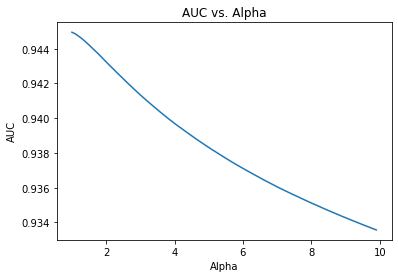

In [378]:
#La classe MultinominalNB n'a qu'un seul hypterparamètre - alpha. 
#Le code ci-dessous nous aidera à trouver la valeur alpha qui nous donne le score CV AUC le plus élevé.

from sklearn.naive_bayes import MultinomialNB

res = pd.Series([get_auc_CV(MultinomialNB(i)) for i in np.arange(1, 10, 0.1)],index=np.arange(1, 10, 0.1))

best_alpha = np.round(res.idxmax(), 2)
print('La meilleur valeur de alpha est : ', best_alpha)

plt.plot(res)
plt.title('AUC vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('AUC')
plt.show()

## Evaluation sur les données de Validation 
- Pour évaluer les performances de notre modèle, nous calculerons le taux de précision et le score AUC de notre modèle sur l'ensemble de validation.

In [381]:
from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    """
    - Imprimer de l'AUC et la précision sur l'ensemble de test 
    - Plot ROC 
    @params probs (np.array): un tableau de probabilités prédites de forme (len (y_true), 2) 
    @params y_true (np.array): un tableau des vraies valeurs avec forme (len (y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Obtention de la precision sur les data de tests
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Précision: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Caractéristique de fonctionnement')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Taux vrai positif')
    plt.xlabel('Taux de faux positifs')
    plt.show()

AUC: 0.9435
Précision: 79.67%


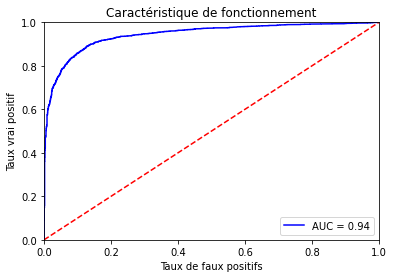

In [382]:
# Compute predicted probabilities
nb_model = MultinomialNB(alpha=1.8)
nb_model.fit(X_train_tfidf, y_train)
probs = nb_model.predict_proba(X_test_tfidf)

# Evaluate the classifier
evaluate_roc(probs, y_test)

# -------------***********----------------------*****-------------

# Fine-tuning BERT

#### La bibliothèque de transformateurs de Hugging(transformers) Face contient l'implémentation PyTorch de modèles NLP de pointe, 
#### notamment BERT (de Google), GPT (d'OpenAI) ... et des poids de modèles pré-entraînés.

- ### Tokenization et formatage des entrées 
    * Avant de tokeniser notre texte, nous effectuerons un léger traitement sur notre texte, y compris la suppression des mentions d'entité (par exemple @united, @name, etc) et certains caractères spéciaux.
    * The level of processing here is much less than in previous approachs because BERT was trained with the entire sentences.

In [384]:
#preprocessing
def text_preprocessing(text):
    """
    - Supprissions des mentions d'entité et d'anotations (par exemple @united, @name) 
    - Corection et remplacemenyt des erreurs eet carractères spéciaux(par exemple. '&' À '&') 
    @param text (str): une chaîne à traiter. 
    @return text (Str): la chaîne traitée.
    """
    # Supprissions des mentions d'entité et d'anotations (par exemple @united, @name)
    text = re.sub(r'(@.*?)[\s]', ' ', text)

    # remplacement des carractères spéciaux (par exemple. '&' À '&')
    text = re.sub(r'&amp;', '&', text)

    # suppression des espace blanc, vide
    text = re.sub(r'\s+', ' ', text).strip()

    return text